In [50]:
import pandas as pd
import numpy as np

data = pd.DataFrame(
    {
        "Negara": ["Indosenia", "Malaysia", "Singapura", "Malaysia", "Thailand", None],
        "A": [1, 2, None, 2, 3, None],
        "B": [5, None, 7, None, None, None],
        "C": [99, 9, None, 9, 11, None],
        "D": [12, 8, 14, 8, 15, None],
    }
)
print("Dataset:")
print(data)

Dataset:
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN


In [51]:
data.describe()

,A,B,C,D
count,4.000000,2.000000,4.000000,5.000000
mean,2.000000,6.000000,32.000000,11.400000
std,0.816497,1.414214,44.676616,3.286335
min,1.000000,5.000000,9.000000,8.000000
25%,1.750000,5.500000,9.000000,8.000000
50%,2.000000,6.000000,10.000000,12.000000
75%,2.250000,6.500000,33.000000,14.000000
max,3.000000,7.000000,99.000000,15.000000


MISSING VALUE

In [52]:
print("\nMissing values in the entire dataset:")
print(data.isnull().sum()) #untuk melihat apakah ada data yang null, kemudian dijumlahkan untuk setiap kolom

print("\nColumns with missing values:")
print(data.columns[data.isnull().any()].tolist()) #untuk menampilkan kolom mana saja yang memiliki nilai null 


Missing values in the entire dataset:
Negara    1
A         2
B         4
C         2
D         1
dtype: int64

Columns with missing values:
['Negara', 'A', 'B', 'C', 'D']


In [53]:
drop_row = data.dropna(how='all') #dropna untuk menghapus nilai null, how='all' akan menghapus baris dengan isi semua null
print(drop_row)

      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0


In [54]:
drop_row = data.dropna(how='any') #how='any' akan menghapus semua baris dengan minimal 1 nilai null
print(drop_row)

      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0


In [55]:
drop_col = data.dropna(thresh=4, axis='columns') #thresh akan menghapus kolom dengan nilai bukan null yang kurang dari angka yang ditetapkan
                                                 # di sini, kolom B hanya memiliki 2 nilai yang bukan null (<4), sehingga kolom B yang dihapuskan
print(drop_col)

      Negara    A     C     D
0  Indosenia  1.0  99.0  12.0
1   Malaysia  2.0   9.0   8.0
2  Singapura  NaN   NaN  14.0
3   Malaysia  2.0   9.0   8.0
4   Thailand  3.0  11.0  15.0
5       None  NaN   NaN   NaN


In [56]:
fill_na = data.fillna({'A':0, 'B':10, 'C':data['C'].mean()}) #mengisi nilai null. bisa dengan angka atau nilai statistik seperti mean dll
print(fill_na)

      Negara    A     B     C     D
0  Indosenia  1.0   5.0  99.0  12.0
1   Malaysia  2.0  10.0   9.0   8.0
2  Singapura  0.0   7.0  32.0  14.0
3   Malaysia  2.0  10.0   9.0   8.0
4   Thailand  3.0  10.0  11.0  15.0
5       None  0.0  10.0  32.0   NaN


In [57]:
print('\nOriginal column A:')
print(data['A'])

dataA_imputed = data['A'].fillna(data['A'].mean()) #mengisi nilai null dengan rata-rata pada kolom tersebut. 8/4=2, sehingga nilai null diisi 2

print('\nImputed column A:')
print(dataA_imputed)


Original column A:
0    1.0
1    2.0
2    NaN
3    2.0
4    3.0
5    NaN
Name: A, dtype: float64

Imputed column A:
0    1.0
1    2.0
2    2.0
3    2.0
4    3.0
5    2.0
Name: A, dtype: float64


In [58]:
print('\nOriginal column B:')
print(data['B'])

dataB_Imputed = data['B'].fillna(method='ffill') #mengisi data null dengan nilai yang sama pada data sebelumnya
print("\nForward-filled column B:")
print(dataB_Imputed)

dataB_Imputed = data['B'].fillna(method='bfill') #mengisi data null dengan nilai yang sama pada data setelahnya
print("\nBackward-filled column B:")
print(dataB_Imputed)



Original column B:
0    5.0
1    NaN
2    7.0
3    NaN
4    NaN
5    NaN
Name: B, dtype: float64

Forward-filled column B:
0    5.0
1    5.0
2    7.0
3    7.0
4    7.0
5    7.0
Name: B, dtype: float64

Backward-filled column B:
0    5.0
1    7.0
2    7.0
3    NaN
4    NaN
5    NaN
Name: B, dtype: float64


/var/folders/vt/fphsv6695mj1tgxphw4lf8700000gn/T/ipykernel_22798/217558247.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataB_Imputed = data['B'].fillna(method='ffill') #mengisi data null dengan nilai yang sama pada data sebelumnya
/var/folders/vt/fphsv6695mj1tgxphw4lf8700000gn/T/ipykernel_22798/217558247.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataB_Imputed = data['B'].fillna(method='bfill') #mengisi data null dengan nilai yang sama pada data setelahnya


DATA DUPLICATE

In [59]:
duplicate = data.duplicated() #menampilkan data yang duplicate
data[duplicate]

,Negara,A,B,C,D
3,Malaysia,2.0,NaN,9.0,8.0


In [60]:
duplicated_data = data.drop_duplicates() #menghapus baris yang duplicate
print(duplicated_data)

      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN


In [61]:
duplicated_data = data.drop_duplicates(keep='last') #membuat baris duplicate yang terakhir yang tetap ada
print(duplicated_data)

      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN


TYPO DATA

In [62]:
typo_data = data.copy()
typo_data['Negara'] = typo_data['Negara'].replace(['Indosenia'], 'Indonesia') #mengubah data typo di kolom tertentu
print(typo_data)

      Negara    A    B     C     D
0  Indonesia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN


In [63]:
typo_data['Negara'] = typo_data['Negara'].replace(['Indosenia', 'Thailand'], ['Indonesia', 'Brunei']) #mengubah data typo di kolom tertentu (kasus lebih dari 1 data)
print(typo_data)

      Negara    A    B     C     D
0  Indonesia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4     Brunei  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN


OUTLIER DATA

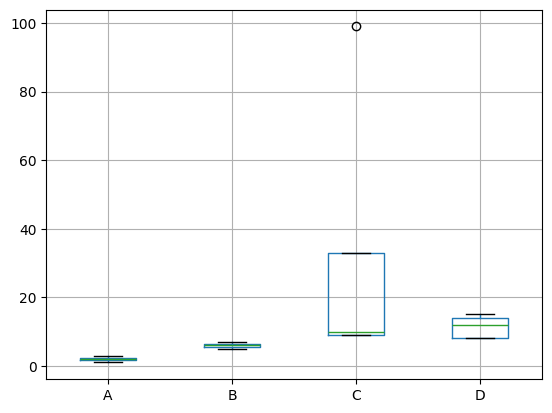

In [64]:
boxplot = data.boxplot(column=['A', 'B', 'C', 'D'])

In [65]:
drop_row = data.dropna(how='all') #how='all' akan menghapus baris dengan isi semua null
print(drop_row)

      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0


In [66]:
fill_na = drop_row.fillna({'A':0, 'B':0, 'C':0, 'D':0}) #mengisi semua nilai null pada masing-masing baris dengan 0
print(fill_na)

      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  0.0   9.0   8.0
2  Singapura  0.0  7.0   0.0  14.0
3   Malaysia  2.0  0.0   9.0   8.0
4   Thailand  3.0  0.0  11.0  15.0


In [67]:
Q1 = fill_na['C'].quantile(0.25)
Q3 = fill_na['C'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

2.0


In [73]:
upper_limit = Q3 + 1.5 * IQR #rumus batas atas untuk penentuan outlier
lower_limit = Q1 - 1.5 * IQR #rumus batas bawah untuk penentuan outlier

print("upper_limit:", upper_limit) 
print("lower_limit:", lower_limit)
print("Jadi jika nilai di luar 14.0 dan 6.0 maka akan dianggap sebagai outliers")

upper_limit: 14.0
lower_limit: 6.0
Jadi jika nilai di luar 14.0 dan 6.0 maka akan dianggap sebagai outliers


In [84]:
print(fill_na)
fill_na[fill_na['D'] > upper_limit] #akan menunjukkan kolom mana yang memiliki nilai yang melebihi upper limit pada baris yang ditentukan

      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  0.0   9.0   8.0
2  Singapura  0.0  7.0   0.0  14.0
3   Malaysia  2.0  0.0   9.0   8.0
4   Thailand  3.0  0.0  11.0  15.0


,Negara,A,B,C,D
4,Thailand,3.0,0.0,11.0,15.0


In [90]:
print(fill_na)
fill_na[fill_na['C'] < lower_limit] #akan menunjukkan kolom mana yang memiliki nilai yang kurang dari lower limit pada baris yang ditentukan

      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  0.0   9.0   8.0
2  Singapura  0.0  7.0   0.0  14.0
3   Malaysia  2.0  0.0   9.0   8.0
4   Thailand  3.0  0.0  11.0  15.0


,Negara,A,B,C,D
2,Singapura,0.0,7.0,0.0,14.0


In [100]:
# 1. Trimming Outliers
new_df = fill_na[fill_na['C'] < upper_limit] #hanya kolom yang memiliki nilai kurang dari upper limit pada baris yang ditentukan yang akan muncul
print(new_df)

      Negara    A    B     C     D
1   Malaysia  2.0  0.0   9.0   8.0
2  Singapura  0.0  7.0   0.0  14.0
3   Malaysia  2.0  0.0   9.0   8.0
4   Thailand  3.0  0.0  11.0  15.0


In [104]:
print("upper_limit:", upper_limit) 
print("lower_limit:", lower_limit)

upper_limit: 14.0
lower_limit: 6.0


In [109]:
new_df_cap = fill_na.copy()
new_df_cap['C'] = np.where(
    new_df_cap['C'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['C'] < lower_limit,
        lower_limit,
        new_df_cap['C']
    )
)
print(new_df_cap)
print("\nMengganti nilai outliers, di mana jika nilai > upper limit maka akan diganti menjadi nilai upper limitnya.")
print("Jika nilai < lower limit maka akan diganti menjadi nilai lower limitnya.")

      Negara    A    B     C     D
0  Indosenia  1.0  5.0  14.0  12.0
1   Malaysia  2.0  0.0   9.0   8.0
2  Singapura  0.0  7.0   6.0  14.0
3   Malaysia  2.0  0.0   9.0   8.0
4   Thailand  3.0  0.0  11.0  15.0

Mengganti nilai outliers, di mana jika nilai > upper limit maka akan diganti menjadi nilai upper limitnya.
Jika nilai < lower limit maka akan diganti menjadi nilai lower limitnya.
